In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
sns.set(font_scale=1.2)
sns.set_style("darkgrid")
from scipy import stats
color = sns.color_palette()[0]

In [70]:
rinkeby = pd.read_csv("rinkeby.csv")
rinkeby.head()

,purchaseOrderTime,purchaseOrderGas,makeOrderTime,makeOrderGas,sourceTime,sourceGas,genTime,genGas
0,25.319,196341,26.495,55216,11.417,304009,13.432,94809
1,24.028,196341,13.537,55152,34.092,303945,31.706,94745
2,26.836,196341,11.766,55216,9.582,304009,31.874,94809
3,45.600,196341,13.208,55216,11.548,304009,9.120,94809
4,29.501,196341,14.289,55216,31.488,304009,11.489,94745


In [71]:
ropsten = pd.read_csv("ropsten.csv")
ropsten.drop(labels=[11],axis=0, inplace=True)
ropsten.head()

,purchaseOrderTime,purchaseOrderGas,makeOrderTime,makeOrderGas,sourceTime,sourceGas,genTime,genGas
0,35.760,203611,31.603,74410,17.704,334603,14.629,91803
1,9.184,203611,4.036,55210,34.488,304603,11.854,76803
2,111.319,203611,24.921,55210,68.011,304603,27.146,76803
3,29.872,203611,4.009,55198,4.696,304591,31.688,76803
4,52.010,203611,31.498,55210,3.256,304603,3.542,76791


In [72]:
ropsten = pd.read_csv("ropsten.csv")
ropsten.head()

,purchaseOrderTime,purchaseOrderGas,makeOrderTime,makeOrderGas,sourceTime,sourceGas,genTime,genGas
0,35.760,203611,31.603,74410,17.704,334603,14.629,91803
1,9.184,203611,4.036,55210,34.488,304603,11.854,76803
2,111.319,203611,24.921,55210,68.011,304603,27.146,76803
3,29.872,203611,4.009,55198,4.696,304591,31.688,76803
4,52.010,203611,31.498,55210,3.256,304603,3.542,76791


In [73]:
rinkeby.describe()

,purchaseOrderTime,purchaseOrderGas,makeOrderTime,makeOrderGas,sourceTime,sourceGas,genTime,genGas
count,33.000000,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,21.819212,196341.0,16.462485,55212.121212,17.982970,304005.121212,17.763788,94801.242424
std,8.236516,0.0,7.610564,15.507574,10.337577,15.507574,9.527114,21.211775
min,8.475000,196341.0,4.152000,55152.000000,1.186000,303945.000000,0.507000,94745.000000
25%,15.291000,196341.0,10.663000,55216.000000,9.836000,304009.000000,11.489000,94809.000000
50%,21.740000,196341.0,13.746000,55216.000000,13.073000,304009.000000,15.143000,94809.000000
75%,27.108000,196341.0,22.046000,55216.000000,27.214000,304009.000000,27.557000,94809.000000
max,45.600000,196341.0,33.897000,55216.000000,38.328000,304009.000000,31.874000,94809.000000


In [74]:
def run_bootstrap(data, samples=1000, size=10):
    time_list = []
    for i in range(samples):
        s = np.random.choice(data, size=size, replace=True)
        time_list.append(np.mean(s))
    return time_list    

In [76]:
# Nets
ropsten_bs_po_time = run_bootstrap(ropsten.purchaseOrderTime)
ropsten_bs_mo_time = run_bootstrap(ropsten.makeOrderTime)
ropsten_bs_so_time = run_bootstrap(ropsten.sourceTime)
ropsten_bs_ge_time = run_bootstrap(ropsten.genTime)

Text(0.5, 0, 'Mining time in sec')

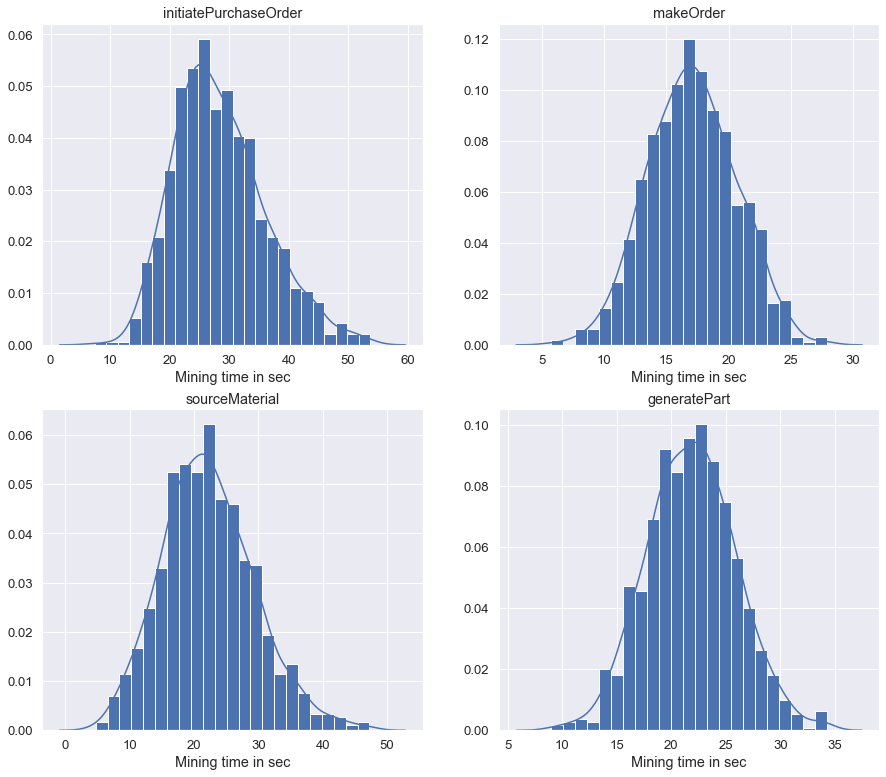

In [77]:
f, ax = plt.subplots(2,2, figsize=(15,13))
sns.distplot(ropsten_bs_po_time, ax=ax[0][0],hist_kws={'alpha':1})
ax[0][0].set_title("initiatePurchaseOrder")
ax[0][0].set_xlabel("Mining time in sec")
ax[0][0].set_label("dsd")


sns.distplot(ropsten_bs_mo_time, ax=ax[0][1],hist_kws={'alpha':1})
ax[0][1].set_title("makeOrder")
ax[0][1].set_xlabel("Mining time in sec")

sns.distplot(ropsten_bs_so_time, ax=ax[1][0],hist_kws={'alpha':1})
ax[1][0].set_title("sourceMaterial")
ax[1][0].set_xlabel("Mining time in sec")

sns.distplot(ropsten_bs_ge_time, ax=ax[1][1],hist_kws={'alpha':1})
ax[1][1].set_title("generatePart")
ax[1][1].set_xlabel("Mining time in sec")



In [78]:
ropsten_bs_po_time_s = pd.Series(ropsten_bs_po_time)
ropsten_bs_po_time_s.describe()

count    1000.000000
mean       28.466215
std         7.574410
min         7.439600
25%        22.922925
50%        27.403350
75%        32.934975
max        53.701800
dtype: float64

In [79]:
stats.norm.interval(0.95, loc=ropsten_bs_po_time_s.describe()['mean'], 
                    scale=ropsten_bs_po_time_s.describe()['std'])

(13.62064331056588, 43.31178580803936)

In [80]:
ropsten_bs_mo_time_s = pd.Series(ropsten_bs_mo_time)
ropsten_bs_mo_time_s.describe()

count    1000.000000
mean       17.069667
std         3.506683
min         5.717400
25%        14.639825
50%        17.055750
75%        19.485275
max        27.927800
dtype: float64

In [81]:
stats.norm.interval(0.95, loc=ropsten_bs_mo_time_s.describe()['mean'], 
                    scale=ropsten_bs_mo_time_s.describe()['std'])

(10.196694191783084, 23.942638985212977)

In [82]:
ropsten_bs_so_time_s = pd.Series(ropsten_bs_so_time)
ropsten_bs_so_time_s.describe()

count    1000.000000
mean       22.271121
std         7.117766
min         4.726000
25%        17.353025
50%        21.768700
75%        26.806400
max        47.273900
dtype: float64

In [83]:
stats.norm.interval(0.95, loc=ropsten_bs_so_time_s.describe()['mean'], 
                    scale=ropsten_bs_so_time_s.describe()['std'])

(8.320555693882794, 36.22168589163527)

In [84]:
ropsten_bs_ge_time_s = pd.Series(ropsten_bs_ge_time)
ropsten_bs_ge_time_s.describe()

count    1000.000000
mean       21.851834
std         4.043798
min         9.009500
25%        19.085625
50%        21.829000
75%        24.584625
max        34.254000
dtype: float64

In [85]:
stats.norm.interval(0.95, loc=ropsten_bs_ge_time_s.describe()['mean'], 
                    scale=ropsten_bs_ge_time_s.describe()['std'])

(13.926135943235174, 29.777531620866036)

In [87]:
ropsten.purchaseOrderGas.mean()

203611.0

In [88]:
ropsten.makeOrderGas.mean()

56168.8

In [89]:
ropsten.sourceGas.mean()

306101.8

In [90]:
ropsten.genGas.mean()

74051.2

In [92]:
graph = pd.read_csv("gasgraph.csv")
graph.head()

,method,gas,network
0,initiatePurchaseOrder,196341,Rinkeby
1,initiatePurchaseOrder,203611,Kovan
2,initiatePurchaseOrder,203611,Ropsten
3,makeOrder,55212,Rinkeby
4,makeOrder,55756,Kovan


Text(0, 0.5, 'Mean gas consumed')

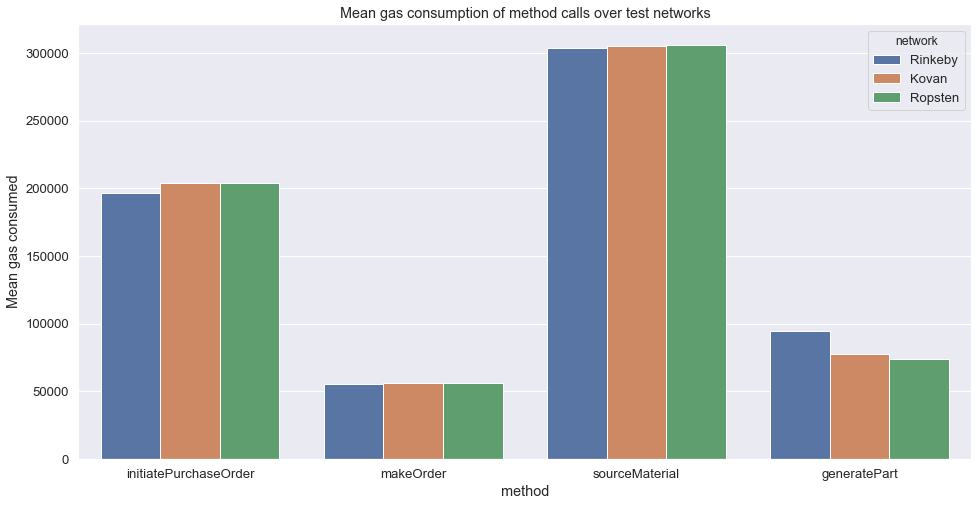

In [97]:
f, ax = plt.subplots(1,1, figsize=(16,8))
sns.barplot(x="method", y="gas", hue="network", data=graph, ax=ax)
ax.set_title("Mean gas consumption of method calls over test networks")
ax.set_ylabel("Mean gas consumed")